In [5]:
# 导入所需的库
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.ensemble import (RandomForestRegressor,
                                                        BaggingRegressor,
                                                        ExtraTreesRegressor)
from sklearn.tree import DecisionTreeRegressor

In [6]:
# 生成需要拟合的数据点——多次函数曲线
def compute(x):
    return 1.5 * np.exp(-x ** 2) + 1.1 * np.exp(-(x - 2) ** 2)
def f(x):
    x = x.ravel()
    return compute(x)
def generate(n_samples, noise):
    X = np.random.rand(n_samples) * 10 - 4
    X = np.sort(X).ravel()
    y = compute(X) + np.random.normal(0.0, noise, n_samples)
    X = X.reshape((n_samples, 1))
    return X, y


In [7]:
X_train, y_train = generate(250, 0.15)
X_test, y_test = generate(500, 0.15)

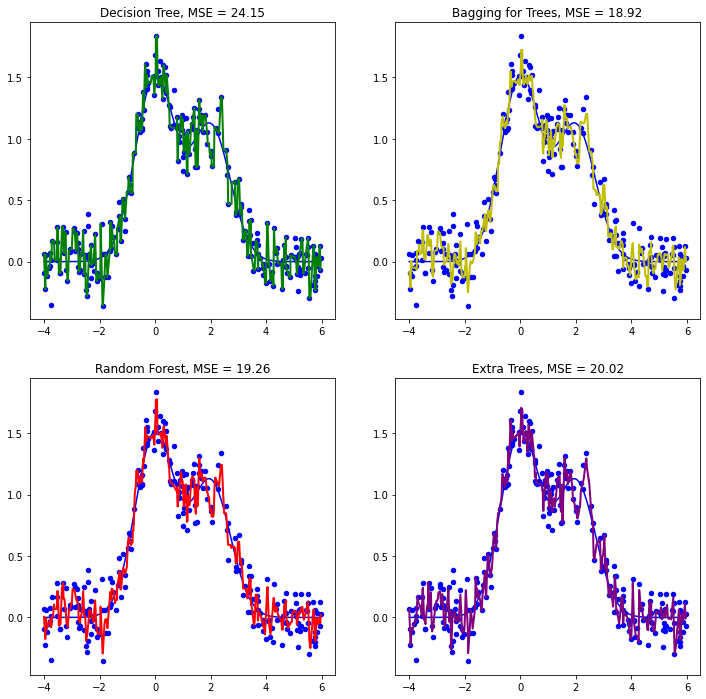

In [8]:
# 用决策树回归模型拟合
dtree = DecisionTreeRegressor().fit(X_train, y_train)
d_predict = dtree.predict(X_test)
plt.figure(figsize = (12, 12))
plt.grid(b=None)
plt.subplot(2, 2, 1)
plt.plot(X_test, f(X_test), "b")
plt.scatter(X_train, y_train, c="b", s=20)
plt.plot(X_test, d_predict, "g", lw=2)
plt.title("Decision Tree, MSE = %.2f" % np.sum((y_test - d_predict) ** 2))

# 用树的Bagging拟合
bdt = BaggingRegressor(DecisionTreeRegressor()).fit(X_train, y_train)
bdt_predict = bdt.predict(X_test)
# plt.figure(figsize = (12, 12))
# plt.grid(b=None)
plt.subplot(2, 2, 2)
plt.plot(X_test, f(X_test), "b")
plt.scatter(X_train, y_train, c="b", s=20)
plt.plot(X_test, bdt_predict, "y", lw=2)
plt.title("Bagging for Trees, MSE = %.2f" % np.sum((y_test - bdt_predict) ** 2));

# 用随机森林回归模型拟合
rf = RandomForestRegressor(n_estimators=10).fit(X_train, y_train)
rf_predict = rf.predict(X_test)
# plt.figure(figsize=(10, 6))
plt.subplot(2,2,3)
plt.plot(X_test, f(X_test), "b")
plt.scatter(X_train, y_train, c="b", s=20)
plt.plot(X_test, rf_predict, "r", lw=2)
plt.title("Random Forest, MSE = %.2f" % np.sum((y_test - rf_predict) ** 2));

# 用计算随机森林模型拟合
et = ExtraTreesRegressor(n_estimators=10).fit(X_train, y_train)
et_predict = et.predict(X_test)
# plt.figure(figsize=(10, 6))
plt.subplot(2,2,4)
plt.plot(X_test, f(X_test), "b")
plt.scatter(X_train, y_train, c="b", s=20)
plt.plot(X_test, et_predict, "purple", lw=2)
plt.title("Extra Trees, MSE = %.2f" % np.sum((y_test - et_predict) ** 2));